# Kvasir-SEG Polyp Dataset – Exploratory Data Analysis (EDA)

## 1. Setup and Imports

In [ ]:
import kagglehub
dataset_path = kagglehub.dataset_download('debeshjha1/kvasirseg')
dataset_path = Path(dataset_path)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from matplotlib.image import imread
import numpy as np
from PIL import Image
import os
import random

## 2. Bounding Box Annotations

* Combine all individual CSVs into a single DataFrame
* Extract image names
* Count polyps per image

In [ ]:
bbox_dir = dataset_path / "Kvasir-SEG/Kvasir-SEG/bbox"
bbox_csv_files = list(bbox_dir.glob("*.csv"))

In [ ]:
df_list = []

for csv in bbox_csv_files:
  df = pd.read_csv(csv)
  # Extract image name from csv file name
  image_name = csv.stem
  df['image'] = image_name
  df_list.append(df)

bbox_df = pd.concat(df_list, ignore_index=True)
bbox_df.head()

,class_name,xmin,ymin,xmax,ymax,image
0,polyp,52,116,258,341,cjyzu9th0qt4r0a46pyl4zik0
1,polyp,204,130,367,310,cju34zivp3fq80988opxbaqyn
2,polyp,56,108,482,466,cju8432cmkgq90871cxe4iptl
3,polyp,220,129,402,348,cju5wi6bqlxy90755bu227nvb
4,polyp,299,43,616,480,cju32zhbnc1oy0801iyv1ix6p


In [ ]:
bbox_df['image'].value_counts()

,count
image,
cju3uhb79gcgr0871orbrbi3x,10
cju414lf2l1lt0801rl3hjllj,4
cju88q6h6obpd0871ckmiabbo,3
cju43c92lm5cj0755lorsorfg,3
cju7fen322ou10817ziqkob4k,3
...,...
cju5buy2bal250818ipl6fqwv,1
cju847pxykriq0755268ktrk2,1
cju2zwg05a0oy0801yr73ig7g,1


## 3. Bounding Box Statistics

Analyze width, height, and area of polyps using box dimensions

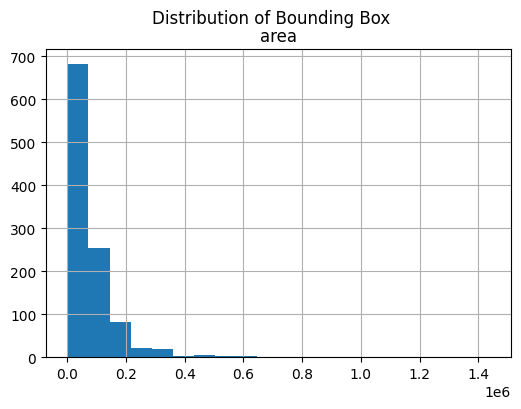

In [ ]:
bbox_df['width'] = bbox_df['xmax'] - bbox_df['xmin']
bbox_df['height'] = bbox_df['ymax'] - bbox_df['ymin']
bbox_df['area'] = bbox_df['width'] * bbox_df['height']
bbox_df[['area']].hist(bins=20, figsize=(6,4))
plt.suptitle("Distribution of Bounding Box")
plt.show()

## 4. Visualizing Image, Mask, and Bounding Box

In [ ]:
annotated_image_dir = dataset_path / "Kvasir-SEG/Kvasir-SEG/annotated_images"
image_dir = dataset_path / "Kvasir-SEG/Kvasir-SEG/images"
mask_dir = dataset_path / "Kvasir-SEG/Kvasir-SEG/masks"

In [ ]:
image_files = sorted(os.listdir(image_dir))
mask_files = sorted(os.listdir(mask_dir))
annotated_files = sorted(os.listdir(annotated_image_dir))

In [ ]:
random_idx = random.randint(0, len(image_files))
multiple = image_files.index('cju3uhb79gcgr0871orbrbi3x.jpg')

In [ ]:
image = np.array(Image.open(image_dir / image_files[multiple]))
mask = np.array(Image.open(mask_dir / mask_files[multiple]))
annotated_image = np.array(Image.open(annotated_image_dir / annotated_files[multiple]))

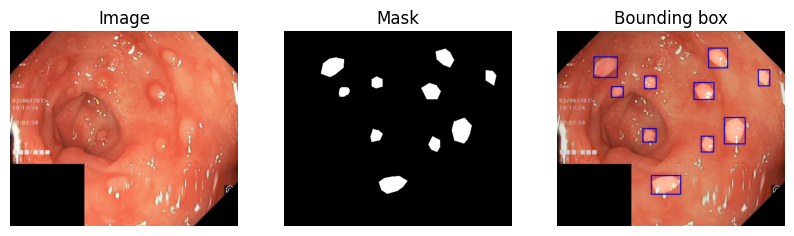

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.imshow(image)
plt.title("Image")
plt.axis(False)

plt.subplot(1,3,2)
plt.imshow(mask, cmap="gray")
plt.title("Mask")
plt.axis(False)

plt.subplot(1,3,3)
plt.imshow(annotated_image)
plt.title("Bounding box")
plt.axis(False)

plt.show()

## 5. Empty Mask Detection

In [ ]:
empty_count = 0
for mask_path in sorted(mask_dir.glob("*png")):
  mask = np.array(Image.open(mask_path).convert("L"))
  if np.sum(mask) == 0:
    print(f"Empty mask: {mask_path.name}")
    empty_count += 1

print(f"Total empty masks: {empty_count}")

Total empty masks: 0


## 6. File Consistency Check

In [ ]:
image_files == mask_files == annotated_files

True